#Uploading the data to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Qualitative_Data.csv to Qualitative_Data.csv


In [ ]:
!pip install textblob
from textblob import TextBlob
import pandas as pd


df = pd.read_csv("Qualitative_Data.csv")

<ipython-input-16-b2626b632c6a>:6: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Qualitative_Data.csv")


In [ ]:
import shutil

# Specify the path to the destination folder in Google Drive
destination_folder = '/content/drive/MyDrive/Colab Notebooks/'

# Move the uploaded files to the specified destination folder
for file_name in uploaded.keys():
    shutil.move(file_name, destination_folder + file_name)

# Sentiment Text Analysis using textblob

## Creating sentiment analysis function

In [ ]:
def analyze_sentiment(text):
    # Check if the text is a string
    if isinstance(text, str):
        analysis = TextBlob(text)

        # Classify the polarity
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    else:
        return 'Unknown'



Applying the function. any non-string values will be labeled as 'Unknown'.

In [ ]:
df['Suggestions_Sentiment'] = df['What overall suggestions would you give for improving this module / study block?'].apply(analyze_sentiment)
df['PositiveAspects_Sentiment'] = df['What were the most positive, helpful or enjoyable aspects of this module?'].apply(analyze_sentiment)


Viewing the Result

In [ ]:
print(df[['Suggestions_Sentiment', 'PositiveAspects_Sentiment']])


      Suggestions_Sentiment PositiveAspects_Sentiment
0                   Unknown                   Unknown
1                   Unknown                  Positive
2                   Unknown                  Positive
3                   Unknown                   Neutral
4                   Unknown                  Positive
...                     ...                       ...
85322               Unknown                  Positive
85323               Unknown                  Positive
85324               Unknown                  Positive
85325               Unknown                   Unknown
85326              Positive                   Unknown

[85327 rows x 2 columns]


Removing all unknowns

In [ ]:
# Remove rows with 'Unknown' sentiment
#df = df[df['Suggestions_Sentiment'] != 'Unknown']
#df = df[df['PositiveAspects_Sentiment'] != 'Unknown']

Error: The issue encountered is that by removing all the unknowns to visualize the sentiment text analysis, the result is an empty dataframe. This is because each question (column) has unknowns where the other question is answered.
Thus, a possible solution is to split the dataset into two parts, one for each question.

## Splitting the dataset

In [ ]:
# DataFrames for entries where each question is answered
df_suggestions = df[df['What overall suggestions would you give for improving this module / study block?'].apply(lambda x: isinstance(x, str))]
df_positive_aspects = df[df['What were the most positive, helpful or enjoyable aspects of this module?'].apply(lambda x: isinstance(x, str))]


Applying sentiment analysis

In [ ]:
df_suggestions = df.dropna(subset=['What overall suggestions would you give for improving this module / study block?']).copy()
df_positive_aspects = df.dropna(subset=['What were the most positive, helpful or enjoyable aspects of this module?']).copy()

df_suggestions.loc[:, 'Suggestions_Sentiment'] = df_suggestions['What overall suggestions would you give for improving this module / study block?'].apply(analyze_sentiment)
df_positive_aspects.loc[:, 'PositiveAspects_Sentiment'] = df_positive_aspects['What were the most positive, helpful or enjoyable aspects of this module?'].apply(analyze_sentiment)


In [ ]:
print(df.columns)


Index(['College', 'Department', 'Division', 'Discipline',
       'Module Occurrence Code', 'Module Name', 'ML Title', 'ML First Name',
       'ML Surname', 'Year', 'Term', 'Year & Term', 'Delivery flag',
       'FHEQ Level',
       'What overall suggestions would you give for improving this module / study block?',
       'What were the most positive, helpful or enjoyable aspects of this module?',
       'Column1', 'Column2', 'Suggestions_Sentiment',
       'PositiveAspects_Sentiment'],
      dtype='object')


In [ ]:
# Creating copies after dropping NA values
df_suggestions = df.dropna(subset=['What overall suggestions would you give for improving this module / study block?']).copy()
df_positive_aspects = df.dropna(subset=['What were the most positive, helpful or enjoyable aspects of this module?']).copy()

# Applying sentiment analysis using the .loc accessor
df_suggestions.loc[:, 'Suggestions_Sentiment'] = df_suggestions['What overall suggestions would you give for improving this module / study block?'].apply(analyze_sentiment)
df_positive_aspects.loc[:, 'PositiveAspects_Sentiment'] = df_positive_aspects['What were the most positive, helpful or enjoyable aspects of this module?'].apply(analyze_sentiment)



In [ ]:
print(df['What overall suggestions would you give for improving this module / study block?'].count())


36961


## Further analyses
Aggregating the sentiment scores by both department and year for each of the created datasets (df_suggestions and df_positive_aspects). We will calculate the mean sentiment for each group.

In [ ]:
# Map the sentiment labels to numbers
sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}

df_suggestions['Suggestions_Sentiment'] = df_suggestions['Suggestions_Sentiment'].map(sentiment_mapping)
df_positive_aspects['PositiveAspects_Sentiment'] = df_positive_aspects['PositiveAspects_Sentiment'].map(sentiment_mapping)

### Aggregate by department

Suggestions Sentiment aggregation by department

In [ ]:
suggestions_by_department = df_suggestions.groupby('Department')['Suggestions_Sentiment'].mean().reset_index()
print(suggestions_by_department)

                                           Department  Suggestions_Sentiment
0                              Brunel Business School               0.541414
1                                Brunel Design School               0.486171
2                                   Brunel Law School               0.462041
3                   Department of Arts and Humanities               0.492893
4                  Department of Chemical Engineering               0.535581
5   Department of Civil and Environmental Engineering               0.468476
6                      Department of Computer Science               0.476294
7                 Department of Economics and Finance               0.444444
8                             Department of Education               0.510242
9   Department of Electronic and Electrical Engine...               0.472062
10                      Department of Health Sciences               0.511084
11                        Department of Life Sciences               0.442857

Positive Aspects aggregation by department

In [ ]:
positive_aspects_by_department = df_positive_aspects.groupby('Department')['PositiveAspects_Sentiment'].mean().reset_index()
print(positive_aspects_by_department)

                                           Department  \
0                              Brunel Business School   
1                                Brunel Design School   
2                                   Brunel Law School   
3                   Department of Arts and Humanities   
4                  Department of Chemical Engineering   
5   Department of Civil and Environmental Engineering   
6                      Department of Computer Science   
7                 Department of Economics and Finance   
8                             Department of Education   
9   Department of Electronic and Electrical Engine...   
10                      Department of Health Sciences   
11                        Department of Life Sciences   
12                          Department of Mathematics   
13  Department of Mechanical and Aerospace Enginee...   
14        Department of Social and Political Sciences   

    PositiveAspects_Sentiment  
0                    0.588567  
1                    0.

### Aggregate by Year

Suggestions Aspects aggregation by Year

In [ ]:
suggestions_by_year = df_suggestions.groupby('Year')['Suggestions_Sentiment'].mean().reset_index()
print(suggestions_by_year)


      Year  Suggestions_Sentiment
0  2020-21               0.471496
1  2021-22               0.471890
2  2022-23               0.504776


Positive Aspects aggregation by Year

In [ ]:
positive_aspects_by_year = df_positive_aspects.groupby('Year')['PositiveAspects_Sentiment'].mean().reset_index()
print(positive_aspects_by_year)


      Year  PositiveAspects_Sentiment
0  2020-21                   0.650971
1  2021-22                   0.610564
2  2022-23                   0.620641


## Visualizations

### Visualizations by departments

Visualization for suggestions by departments

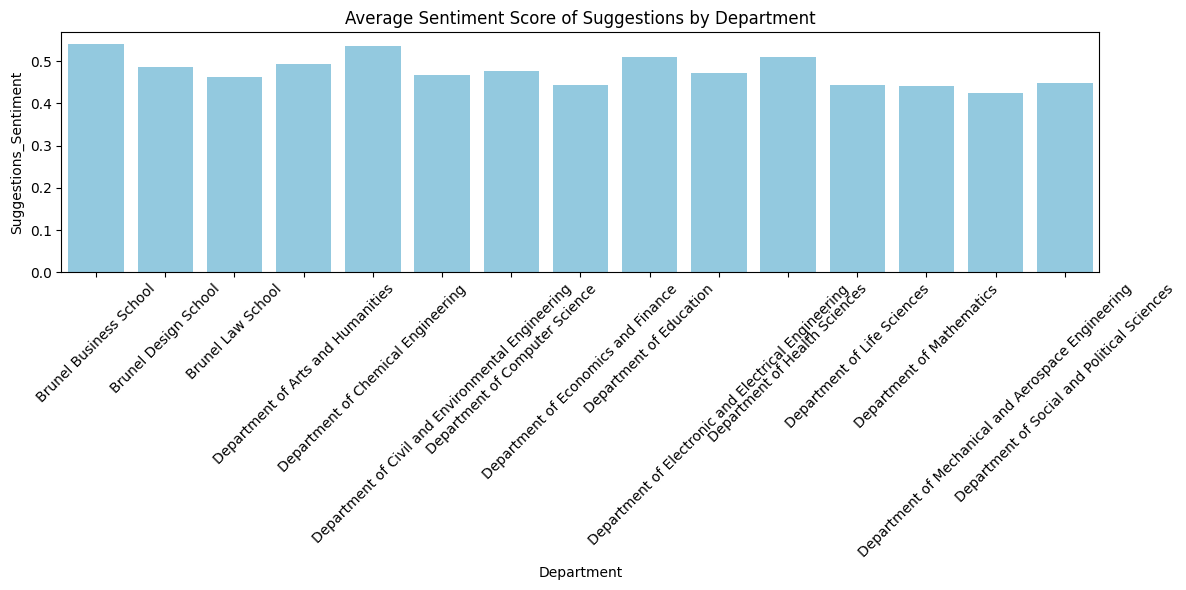

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='Suggestions_Sentiment', data=suggestions_by_department, color='skyblue')
plt.title('Average Sentiment Score of Suggestions by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualization for positive aspects by departments

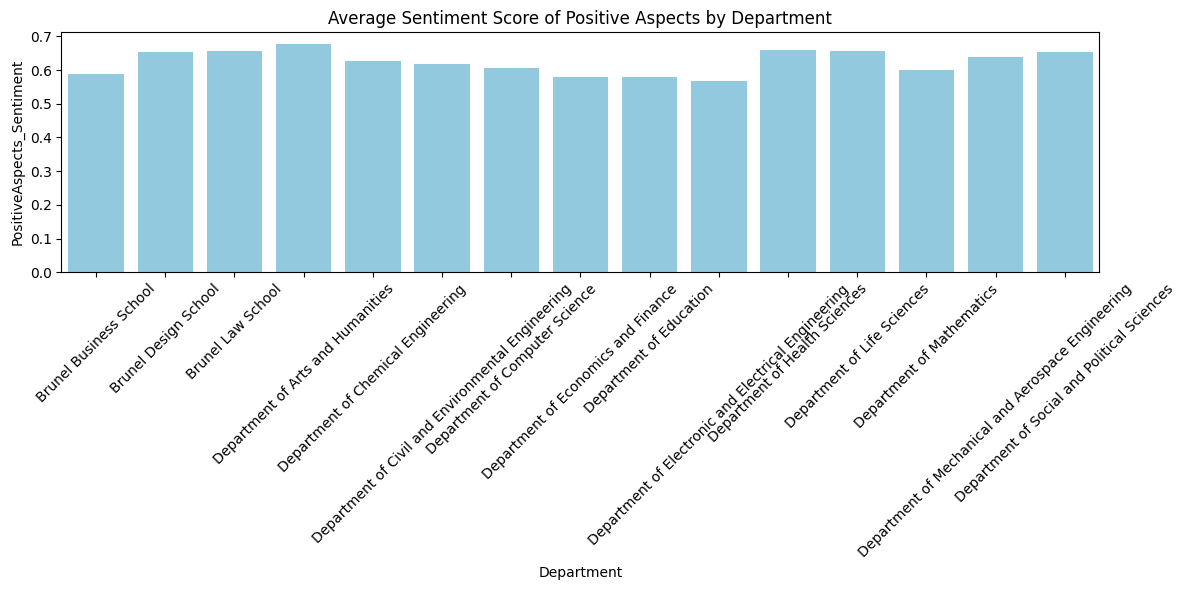

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='PositiveAspects_Sentiment', data=positive_aspects_by_department, color = 'skyblue')
plt.title('Average Sentiment Score of Positive Aspects by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Visualizations by Year

For suggestions by Year

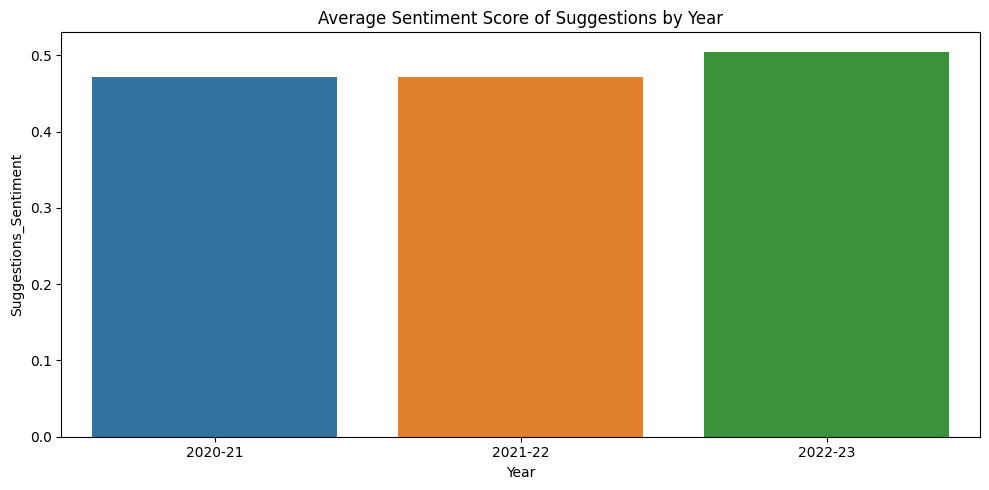

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Suggestions_Sentiment', data=suggestions_by_year)
plt.title('Average Sentiment Score of Suggestions by Year')
plt.tight_layout()
plt.show()


For positive aspects by Year

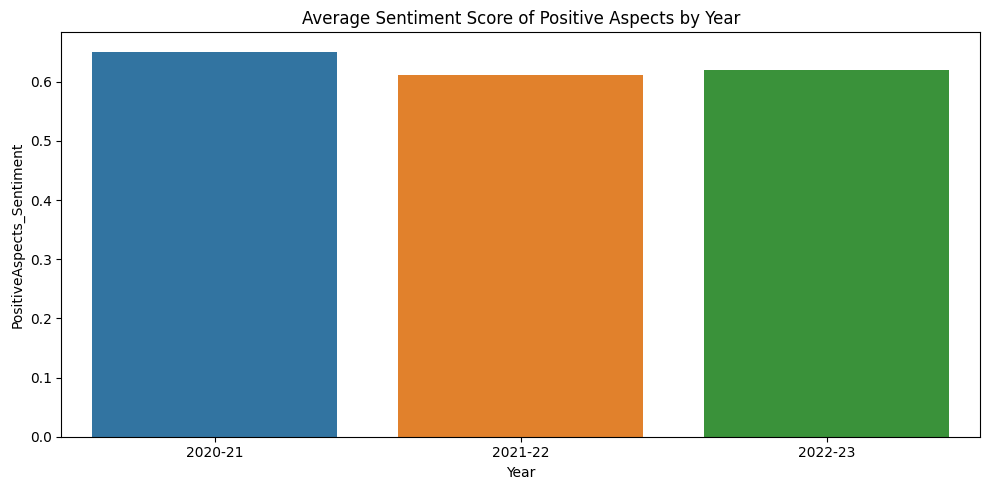

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='PositiveAspects_Sentiment', data=positive_aspects_by_year)
plt.title('Average Sentiment Score of Positive Aspects by Year')
plt.tight_layout()
plt.show()


## Word Cloud

In [ ]:
!pip install wordcloud


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


An error arises that suggests that either the positive or negative feedback datasets have no words in them. This might happen if there's no feedback that was classified as positive or negative.

Prior to generating word cloud, we can handle this issue by checking if the strings positive_text and negative_text are empty.


In [ ]:
# Define a function to create a word cloud
def create_wordcloud(text, title):
    if not text:
        print(f"No words to generate a word cloud for {title}.")
        return

    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'white',
        stopwords = STOPWORDS
    ).generate(str(text))

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds
create_wordcloud(positive_text, "Word Cloud for Positive Feedback")
create_wordcloud(negative_text, "Word Cloud for Negative Feedback")


No words to generate a word cloud for Word Cloud for Positive Feedback.
No words to generate a word cloud for Word Cloud for Negative Feedback.


The issue is fixed. The problem is that they are numerical labels and should thus be reverse mapped into their string representations.


In [ ]:
# Map the sentiment numbers back to labels
reverse_sentiment_mapping = {1: "Positive", 0: "Neutral", -1: "Negative"}

df_suggestions['Suggestions_Sentiment'] = df_suggestions['Suggestions_Sentiment'].map(reverse_sentiment_mapping)
df_positive_aspects['PositiveAspects_Sentiment'] = df_positive_aspects['PositiveAspects_Sentiment'].map(reverse_sentiment_mapping)


Now that we have the sentiment labels back as strings, we can then extract the positive and negative texts for the word clouds

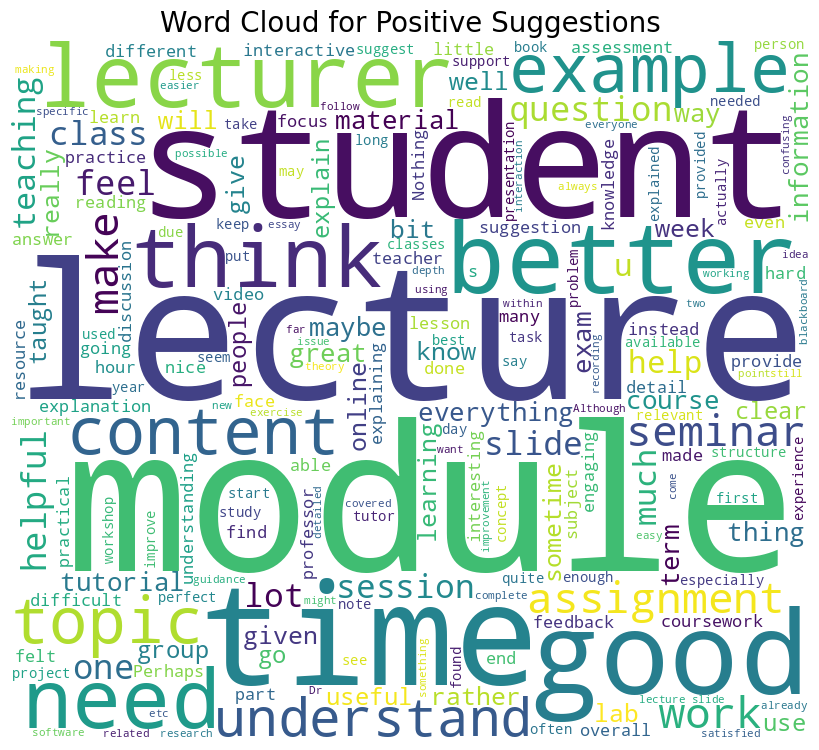

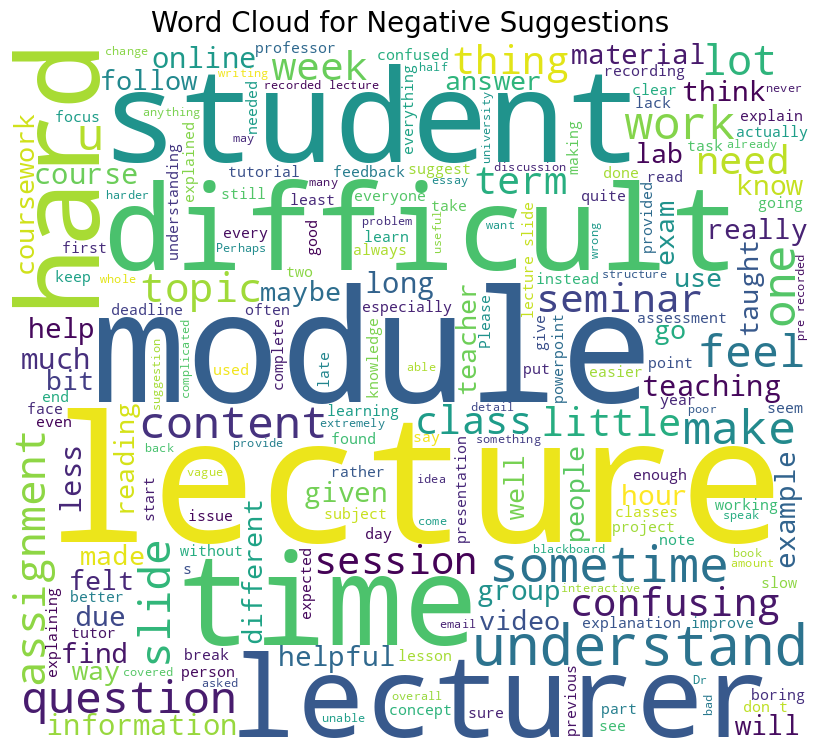

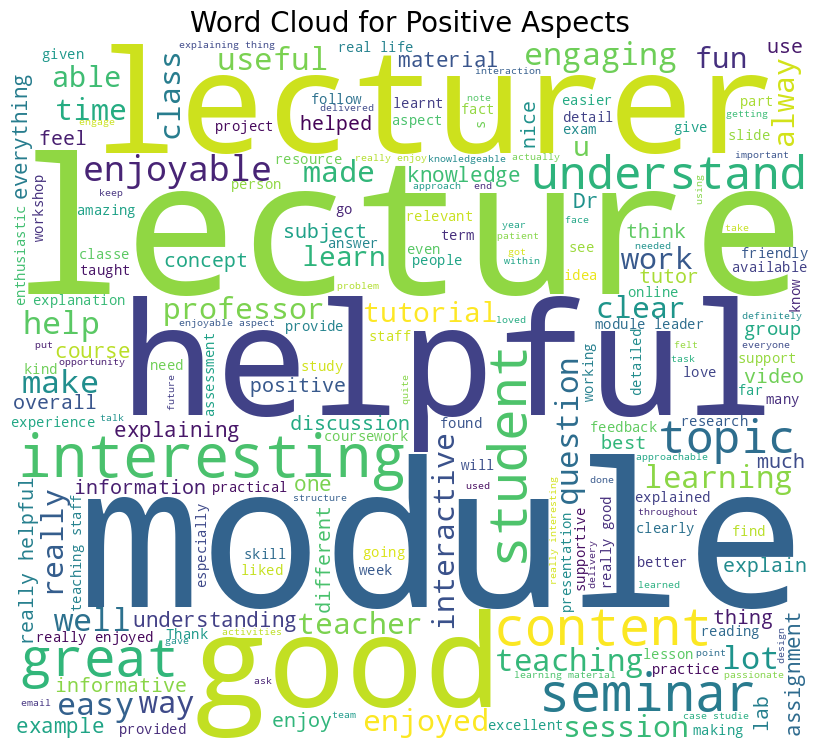

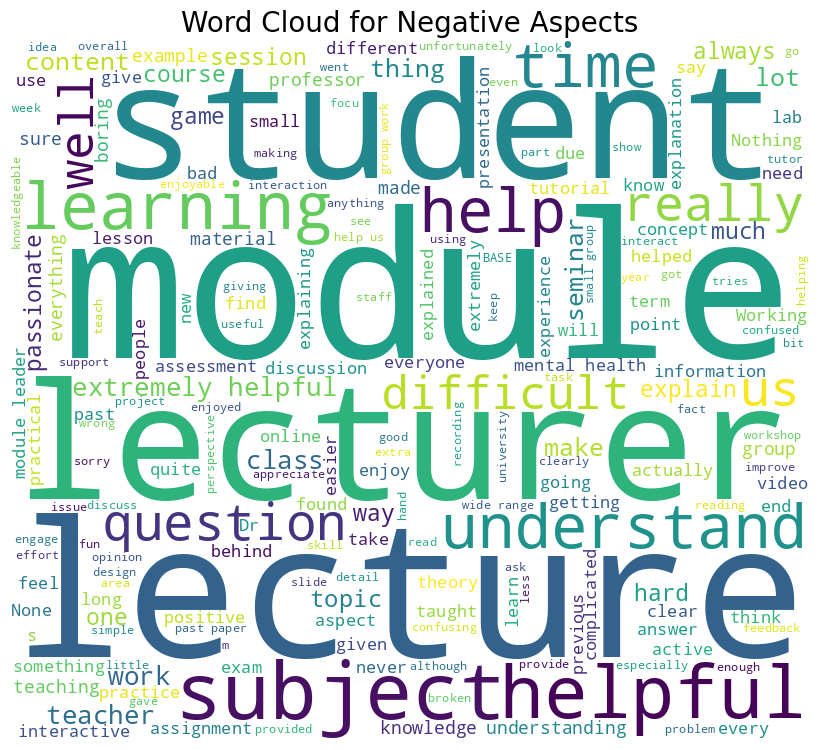

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract positive and negative feedback for both datasets
positive_text_suggestions = ' '.join(df_suggestions.loc[df_suggestions['Suggestions_Sentiment'] == 'Positive', 'What overall suggestions would you give for improving this module / study block?'])
negative_text_suggestions = ' '.join(df_suggestions.loc[df_suggestions['Suggestions_Sentiment'] == 'Negative', 'What overall suggestions would you give for improving this module / study block?'])

positive_text_aspects = ' '.join(df_positive_aspects.loc[df_positive_aspects['PositiveAspects_Sentiment'] == 'Positive', 'What were the most positive, helpful or enjoyable aspects of this module?'])
negative_text_aspects = ' '.join(df_positive_aspects.loc[df_positive_aspects['PositiveAspects_Sentiment'] == 'Negative', 'What were the most positive, helpful or enjoyable aspects of this module?'])

# Function to plot word cloud
def plot_word_cloud(text, title):
    if len(text) == 0:
        print(f"No words to generate a word cloud for {title}.")
        return
    wordcloud = WordCloud(width = 800, height = 700,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize=20)
    plt.show()

# Generate word clouds
plot_word_cloud(positive_text_suggestions, "Word Cloud for Positive Suggestions")
plot_word_cloud(negative_text_suggestions, "Word Cloud for Negative Suggestions")
plot_word_cloud(positive_text_aspects, "Word Cloud for Positive Aspects")
plot_word_cloud(negative_text_aspects, "Word Cloud for Negative Aspects")
